In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# modeling utilities
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn import tree

#### Loading Data

In [ ]:
customer_df = pd.read_csv('/content/drive/MyDrive/MiniProject /3. Clustering/DS3_C6_S3_MallCustomers_Data_Project.csv')
customer_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# shape of the dataset
print('The number of samples in data is {}.'.format(customer_df.shape[0]))

The number of samples in data is 200.


#### Preprocessing Data

In [ ]:
customer_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


There is no huge difference in the scales of Age, Annual Income and Spending Score features, so ne need to scale this dataset.

#### Making a copy of Main Dataset

In [ ]:
customer_df1=customer_df

In [ ]:
# Checking for null value in each column
print(customer_df1.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


## 1. Data Exploration and Visualization - Understanding the data

In [ ]:
# explore the existing data types
customer_df1.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

As we can see from the Data Exploration Gender is present in object datatype but python cannot unbderstand this datatype, therefore we have to convert it into Numerical datatype as it is much more readable.

In [ ]:
#explore the numeric data types
customer_df1.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# check missing values in data
print(customer_df1.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [ ]:
X = customer_df1.iloc[:, [3, 4]].values

In [ ]:
list = ["Gender"]                         
for i in list :
  customer_df1[i] = customer_df1[i].astype("category")           ## to convert the non numerical column to categorical column
  print(customer_df1)
print(customer_df1.dtypes)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]
CustomerID                   int64
Gender                    category
Age                          i

In [ ]:
# explore the existing data types
customer_df1.dtypes

CustomerID                   int64
Gender                    category
Age                          int64
Annual Income (k$)           int64
Spending Score (1-100)       int64
dtype: object

In [ ]:
#encoding the categorical data into numerical data
label_encoder = preprocessing.LabelEncoder()

lst_1 = ["Gender"]
for i in lst_1:
  customer_df1[i] = label_encoder.fit_transform(customer_df1[i])
customer_df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [ ]:
customer_df1.dtypes

CustomerID                int64
Gender                    int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

### Plotting Dendogram

We need to choose the number of clusters and for doing this, we’ll use Dendrograms.

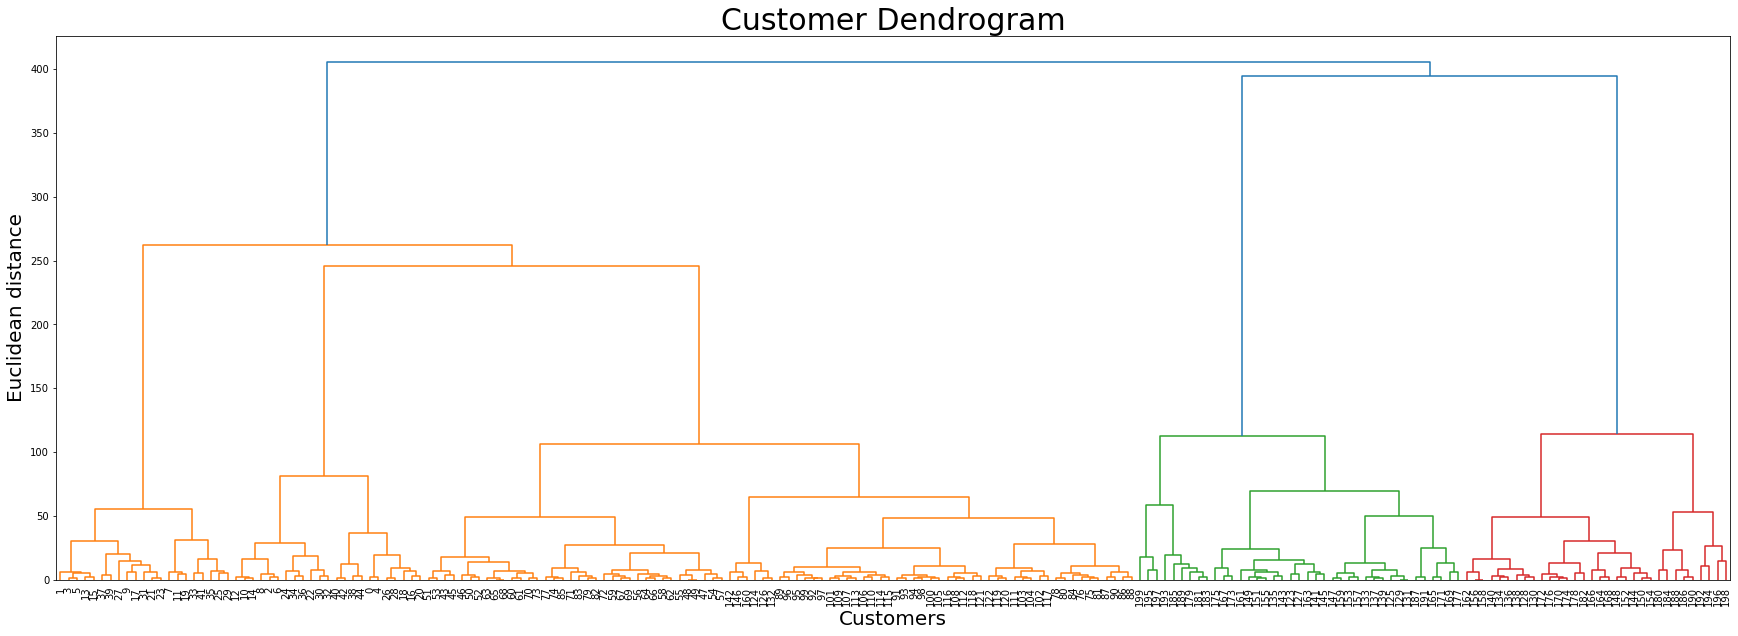

In [ ]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'),labels=customer_df1.index)
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Customer Dendrogram',fontsize=30)
plt.xlabel('Customers',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with the maximum distance is the blue line and hence we can decide a threshold of 200 and cut the dendrogram:

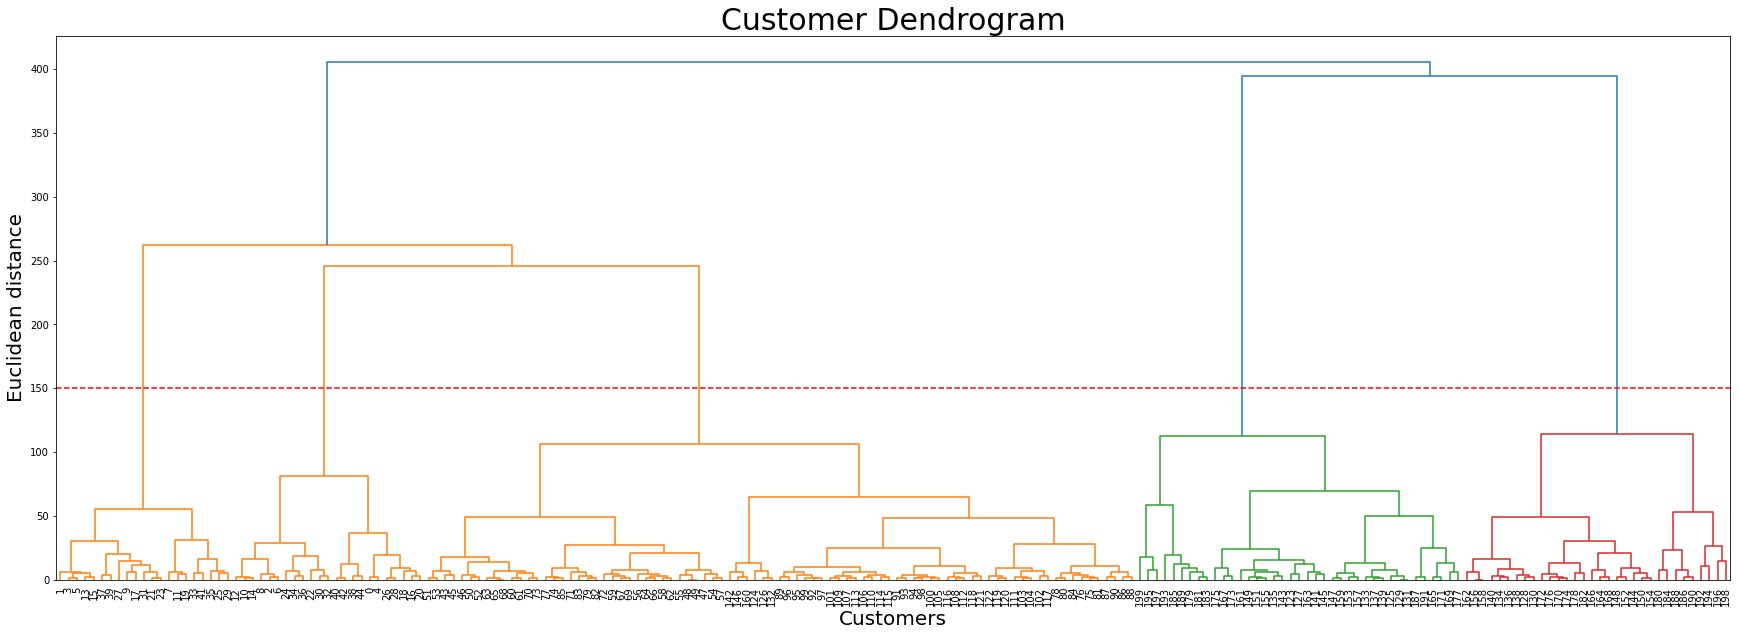

In [ ]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'),labels=customer_df1.index)
plt.axhline(y=150, color='r', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Customer Dendrogram',fontsize=30)
plt.xlabel('Customers',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

In our case, it's 5 for Annual Income (k$) and Spending Score (1-100) and 3 for Age and Spending Score (1-100). So let's fit the Agglomerative model with 5 and 3 clusters.

### Model Building

In [ ]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

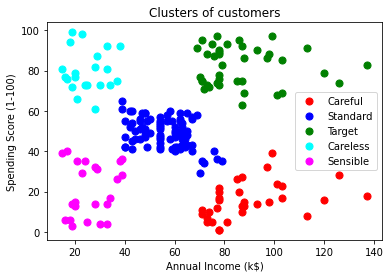

In [ ]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = 'magenta', label = 'Sensible')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

#K-mean

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df  = customer_df1
kmeans = KMeans(n_clusters=3,n_init=3).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

print('Attributes used for cluster model: ')

[[166.5          0.45588235  36.04411765  88.91176471  50.20588235]
 [ 31.01639344   0.39344262  36.91803279  30.36065574  49.73770492]
 [ 96.98591549   0.46478873  43.1971831   59.35211268  50.5915493 ]]
Attributes used for cluster model: 


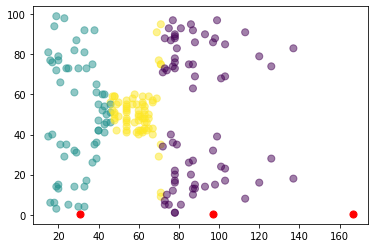

In [ ]:
plt.scatter(customer_df1['Annual Income (k$)'], customer_df1['Spending Score (1-100)'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs 
from sklearn.cluster import KMeans
%matplotlib inline

## Finding the optimum value of K using Elbow Method

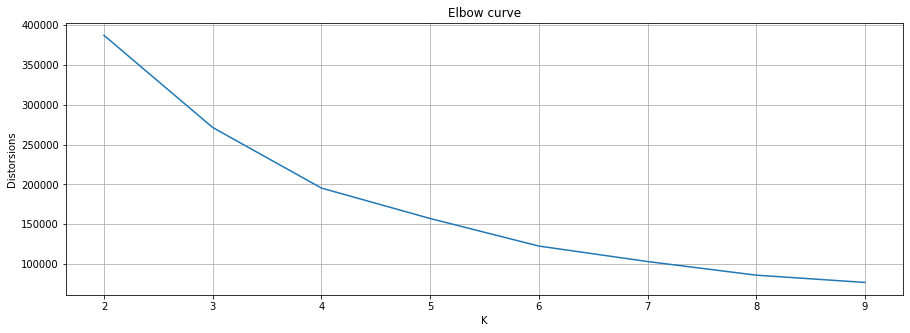

In [ ]:
distorsions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(customer_df1)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), distorsions)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve');

## Finding the optimum value of K and cluster efficiency using Silhouette Score

For n_clusters = 2 The average silhouette_score is : 0.4793049017423563
For n_clusters = 3 The average silhouette_score is : 0.3766801400675223
For n_clusters = 4 The average silhouette_score is : 0.42245261332521894
For n_clusters = 5 The average silhouette_score is : 0.4129419301414886
For n_clusters = 6 The average silhouette_score is : 0.4097364862937783
For n_clusters = 7 The average silhouette_score is : 0.4083245876718172


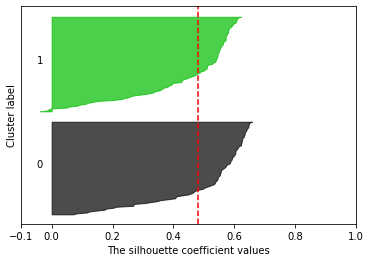

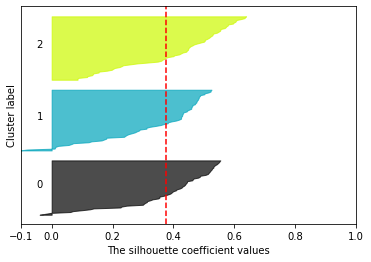

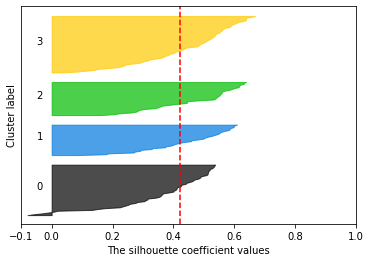

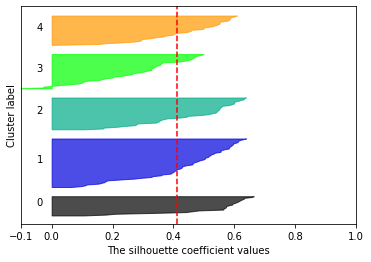

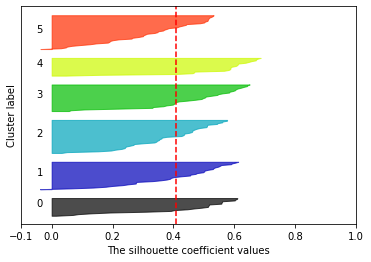

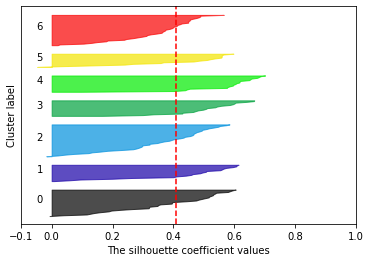

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(customer_df1) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(customer_df1)

    silhouette_avg = silhouette_score(customer_df1, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(customer_df1, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

# DB-Scaan

In [ ]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(X[[0,1]])

DBSCAN()

In [ ]:
X['DBSCAN_labels']=dbscan.labels_ 

# Plotting resulting clusters
#plt.figure(figsize=(10,10))
plt.scatter(X[0],X[1],c=X['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

IndexError: ignored